# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive correlation between the mouse's weight and the tumor volume. looking at a single mouse from the Capomulin regimen shows the drug courses effect on the tumor volume. For mouse s183, Capomulin was successful in decreasing the size of the tumor. Capomulin and Ramicane seem to be the most successful treatments by looking at the mean tumor volume, for these drug regimens have the lowest.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
ms_df = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID'])

# Display the data table for preview
ms_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = len(ms_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
dup_mice = ms_df[ms_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_name = dup_mice["Mouse ID"].unique()
dup_name

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# dup_df = ms_df.loc[['g989']==str(dup_name), :]
# dup_df I tried...

In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = ms_df[ms_df['Mouse ID'].isin(dup_name)==False]
clean_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

In [10]:
drg_reg = clean_df['Drug Regimen'].unique()
drg_reg

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ms_mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
ms_median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
ms_var = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
ms_strd = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
ms_SEM = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# drg_reg = clean_df['Drug Regimen'].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': ms_mean,
                           'Median Tumor Volume': ms_median,
                           'Tumor Volume Variance': ms_var,
                           'Tumor Volume Std. Dev.': ms_strd,
                           'Tumor Volume Std. Err.': ms_SEM
                          })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

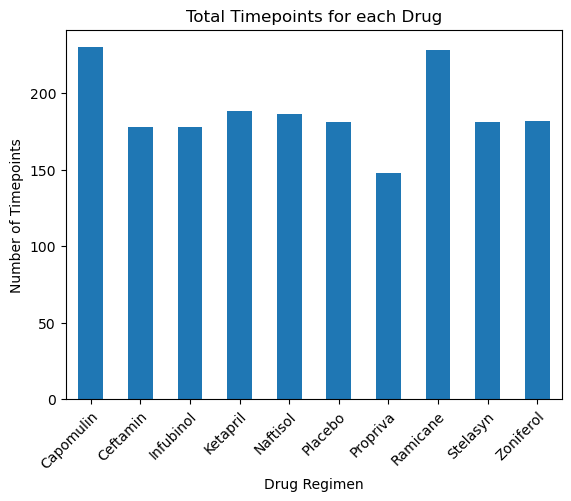

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_tot = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

tot_chart = mouse_tot.plot(kind='bar', title='Total Timepoints for each Drug', 
                         xlabel='Drug Regimen',
                         ylabel='Number of Timepoints')
xlabels = mouse_tot.index
tot_chart.set_xticklabels(xlabels, 
                          rotation=45, 
                          rotation_mode='anchor', 
                          ha='right', 
                          wrap=True)


plt.show()





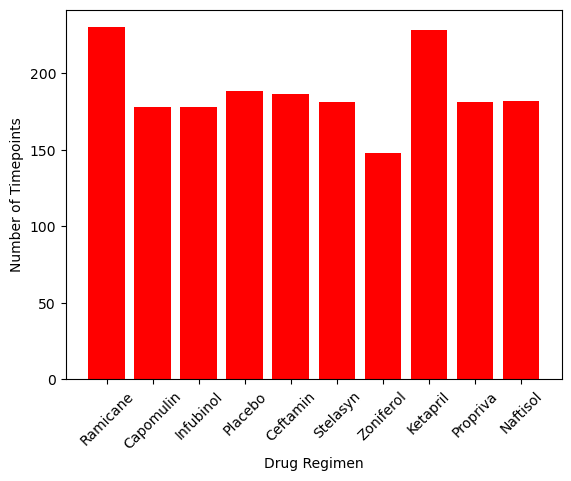

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df['Drug Regimen'].unique()

plt.bar(x_axis, mouse_tot, color='r')
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

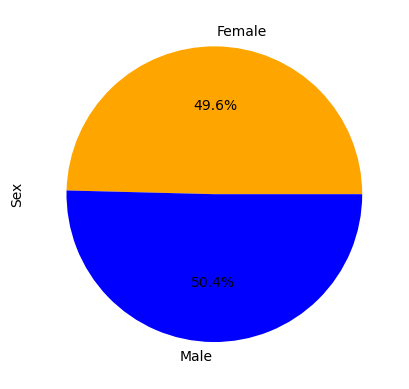

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_sex = clean_df.groupby('Sex')['Mouse ID'].nunique()
sex_chart = pie_sex.plot(kind='pie', label='Sex',
                         labels=pie_sex.index, 
                         autopct='%1.1f%%', 
                         colors=['orange', 'blue'])
plt.show()


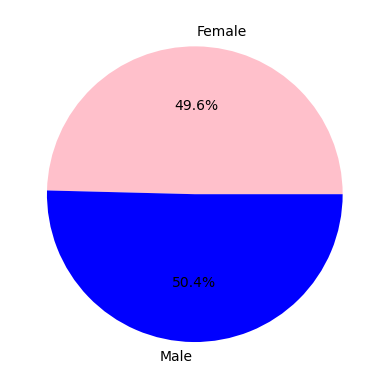

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_sex, 
        labels=pie_sex.index, 
        colors = ['pink', 'blue'], 
        autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_ids = list(clean_df['Mouse ID'].unique())
max_vol = []
max_drugs = []
for ID in mouse_ids:
    max_mouse = clean_df.loc[clean_df['Mouse ID']==ID, :]
    max_time = max_mouse.loc[(max_mouse['Timepoint'].idxmax()), :]
#     max_drug = max_time.loc[max_time['Drug Regimen'], :]
    max_vol.append(max_time['Tumor Volume (mm3)'])
    max_drugs.append(max_time['Drug Regimen'])

tumor_df = pd.DataFrame({'Mouse ID': mouse_ids,
                        "Final Tumor Vol": max_vol,
                        'Drug Regimen': max_drugs}
                       )
# tumor_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, tumor_df, on='Mouse ID')
# merge_df
tumor_df

,Mouse ID,Final Tumor Vol,Drug Regimen
0,k403,22.050126,Ramicane
1,s185,23.343598,Capomulin
2,x401,28.484033,Capomulin
3,m601,28.430964,Capomulin
4,g791,29.128472,Ramicane
...,...,...,...
243,z314,45.934712,Stelasyn
244,z435,48.710661,Propriva
245,z581,62.754451,Infubinol
246,z795,65.741070,Naftisol


In [165]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
fin_tum_list = []
for treat in treatments:
    drug_df = tumor_df.loc[tumor_df['Drug Regimen']==treat, :]
    fin_tum_list.append(drug_df['Final Tumor Vol'])
    
    quartiles = drug_df['Final Tumor Vol'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {round(lower_bound,3)} for {treat} could be outliers')
    print(f'Values above {round(upper_bound, 3)} for {treat} could be outliers')
    outliers = drug_df.loc[(effective_df['Final Tumor Vol'] > upper_bound) |
                        (drug_df['Final Tumor Vol'] < lower_bound)]
    if len(outliers)==0:
        print(f'There are no outliers for {treat}')
            
    else:
        print(f'{treat} has outliers')
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Values below 20.705 for Capomulin could be outliers
Values above 51.832 for Capomulin could be outliers
There are no outliers for Capomulin
Values below 17.913 for Ramicane could be outliers
Values above 54.307 for Ramicane could be outliers
There are no outliers for Ramicane
Values below 36.833 for Infubinol could be outliers
Values above 82.741 for Infubinol could be outliers
There are no outliers for Infubinol
Values below 25.355 for Ceftamin could be outliers
Values above 87.666 for Ceftamin could be outliers
There are no outliers for Ceftamin


/var/folders/q0/1ctrg7ln7537xxm0j8j094dm0000gn/T/ipykernel_758/1336788441.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


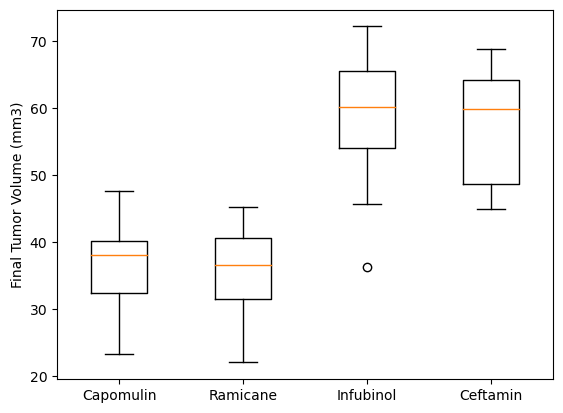

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(fin_tum_list)
plt.show()

## Line and Scatter Plots

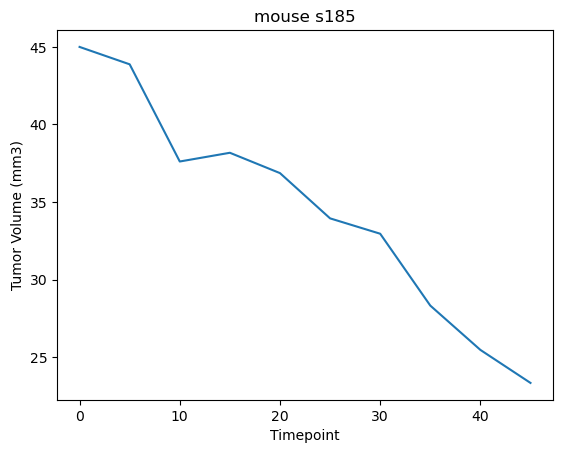

In [192]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
fig2, ax2 = plt.subplots()
capo_id = 's185'
mouse_capo_data = clean_df.loc[clean_df['Mouse ID']==capo_id, :]
tp_line = mouse_capo_data['Timepoint']
tv_line = mouse_capo_data['Tumor Volume (mm3)']
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_title('mouse s185')
ax2.plot(tp_line, tv_line)
plt.show()



Text(0.5, 0, 'Mouse Weight')

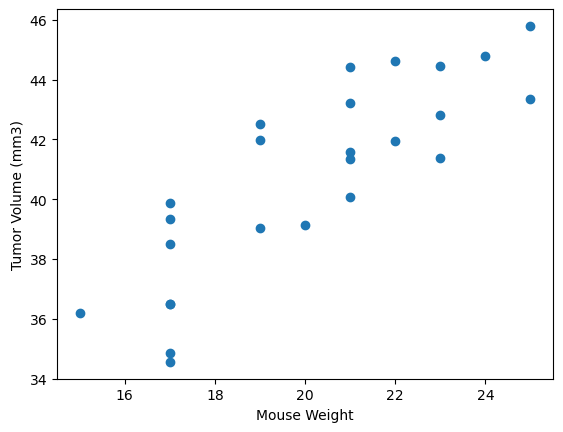

In [194]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen']=='Capomulin', :].groupby('Mouse ID')
weight = capomulin['Weight (g)'].mean()
avg_tum_vol = capomulin['Tumor Volume (mm3)'].mean()
plt.scatter(weight, avg_tum_vol)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')

## Correlation and Regression

The correlation between mouse weight the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


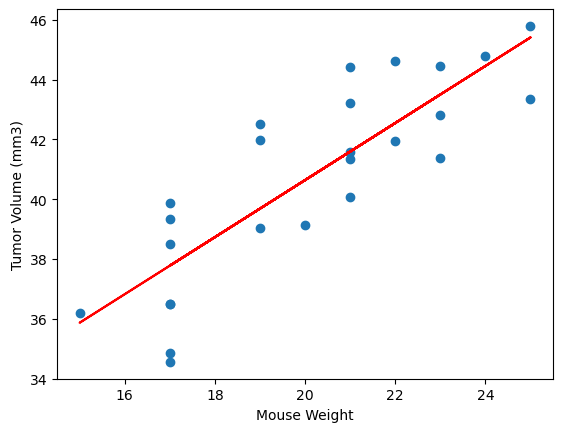

In [197]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slop, intr, r, p, stderr = st.linregress(weight, avg_tum_vol)
capo_line = slop * weight + intr
plt.scatter(weight, avg_tum_vol)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')
plt.plot(weight, capo_line, color='r')
coco = st.pearsonr(weight, avg_tum_vol)
print(f'The correlation between mouse weight the average tumor volume is {coco}')
plt.show()